In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import numpy as np

In [2]:
#getting the dataset 
data_set = pd.read_csv("D:\Detecting parkinsons disease\cleaned-data.csv")

#getting first 5 records
data_set.head()

,Unnamed: 0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00576,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00576,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00576,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,phon_R01_S01_5,116.014,141.781,110.655,0.01101,0.000037,0.00593,0.00576,0.01778,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
#independent and dependent varibale 
X=data_set.drop(['name','status'],axis=1)
y=data_set['status']
#splitting the dataset into test and train data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
# Create adaboost classifer object
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1,base_estimator=clf)

In [5]:
# Train Adaboost Classifer
model = classifier.fit(X_train, y_train)

In [6]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [7]:
pd.DataFrame({'actual status':y_test,"predicted status:":y_pred})

,actual status,predicted status:
179,1,1
192,0,0
84,1,1
119,1,1
90,1,1
172,0,0
160,1,1
128,1,1
178,1,1
123,1,1


In [8]:
#Model Evaluation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9152542372881356


In [9]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_test,y_pred)
cnf

array([[ 8,  4],
       [ 1, 46]], dtype=int64)

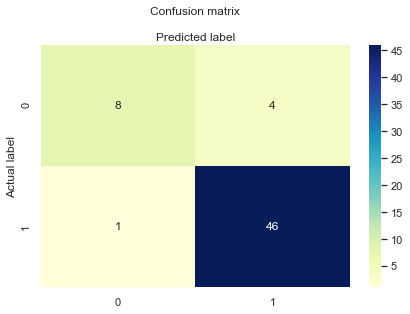

In [10]:
from matplotlib import pyplot
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
class_names=[0,1] # name of classes
fig, ax = pyplot.subplots()
tick_marks = np.arange(len(class_names))
pyplot.xticks(tick_marks, class_names)
pyplot.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
pyplot.tight_layout()
pyplot.title('Confusion matrix', y=1.1)
pyplot.ylabel('Actual label')
pyplot.xlabel('Predicted label')
pyplot.savefig("HeatMap")

In [11]:
from sklearn.metrics import precision_score, recall_score
print("Precision : ",precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))

Precision :  0.92
Recall 0.9787234042553191


AUC - Test Set: 98.05%


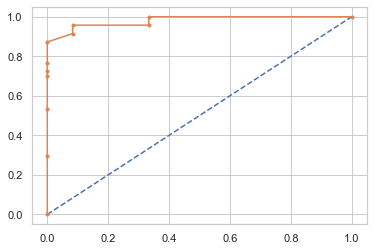

In [12]:
#ROC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# predict probabilities
probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [13]:
#LogLoss
from sklearn.metrics import log_loss
logLoss=log_loss(y_test,y_pred)
print("Logloss: %.2f" % (logLoss))

Logloss: 2.93


In [14]:
#F score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.948454
